## Import Lib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, plot_roc_curve,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
from imblearn.combine import SMOTETomek

In [ ]:
# read CSV file
df=pd.read_csv(r"E:\courses\DEPI\Projects\Fraud_Detection\archive (2)\creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## Get Insights from data

In [ ]:
col_names=df.columns
col_names

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print('length = ',len(df[i].unique()))
    print('-------------------------------')

0         1
379089    1
379083    1
379084    1
379085    1
         ..
189537    1
189536    1
189535    1
189534    1
568629    1
Name: id, Length: 568630, dtype: int64
length =  568630
-------------------------------
-1.704517    3539
-2.459141    1399
-1.161336     259
-1.065576     255
-1.522526     246
             ... 
-0.272852       1
 1.822123       1
 0.556931       1
 0.276802       1
-0.795144       1
Name: V1, Length: 552035, dtype: int64
length =  552035
-------------------------------
 2.599199    3539
 3.326970    1399
 0.528310     259
 1.399009     255
 1.314583     246
             ... 
 0.015921       1
-0.901321       1
-0.192861       1
-0.095077       1
 0.433236       1
Name: V2, Length: 552035, dtype: int64
length =  552035
-------------------------------
-1.205391    3539
-2.476251    1399
-1.169483     259
-1.471620     255
-1.741485     246
             ... 
 0.032879       1
 0.038569       1
-0.276581       1
 0.324786       1
-0.649140       1
Name: V3, 

## Check Nulls


In [ ]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Check duplicates

In [ ]:
df.duplicated().sum()

0

#### Observations

* We have 568630 Rows of observations having 31 columns.
* 'Class' is our Output feature indicating whether the transaction is fraudulent (1) or not (0).
* No missing values observed in our Dataset.
* dtype of all the features looks perfect.

## Visualization

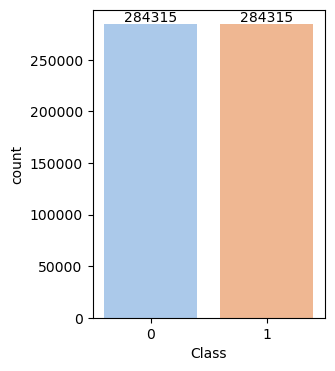

In [ ]:
# Before handle unbalanced data
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Observations from upper graph the dataset is perfectly balanced

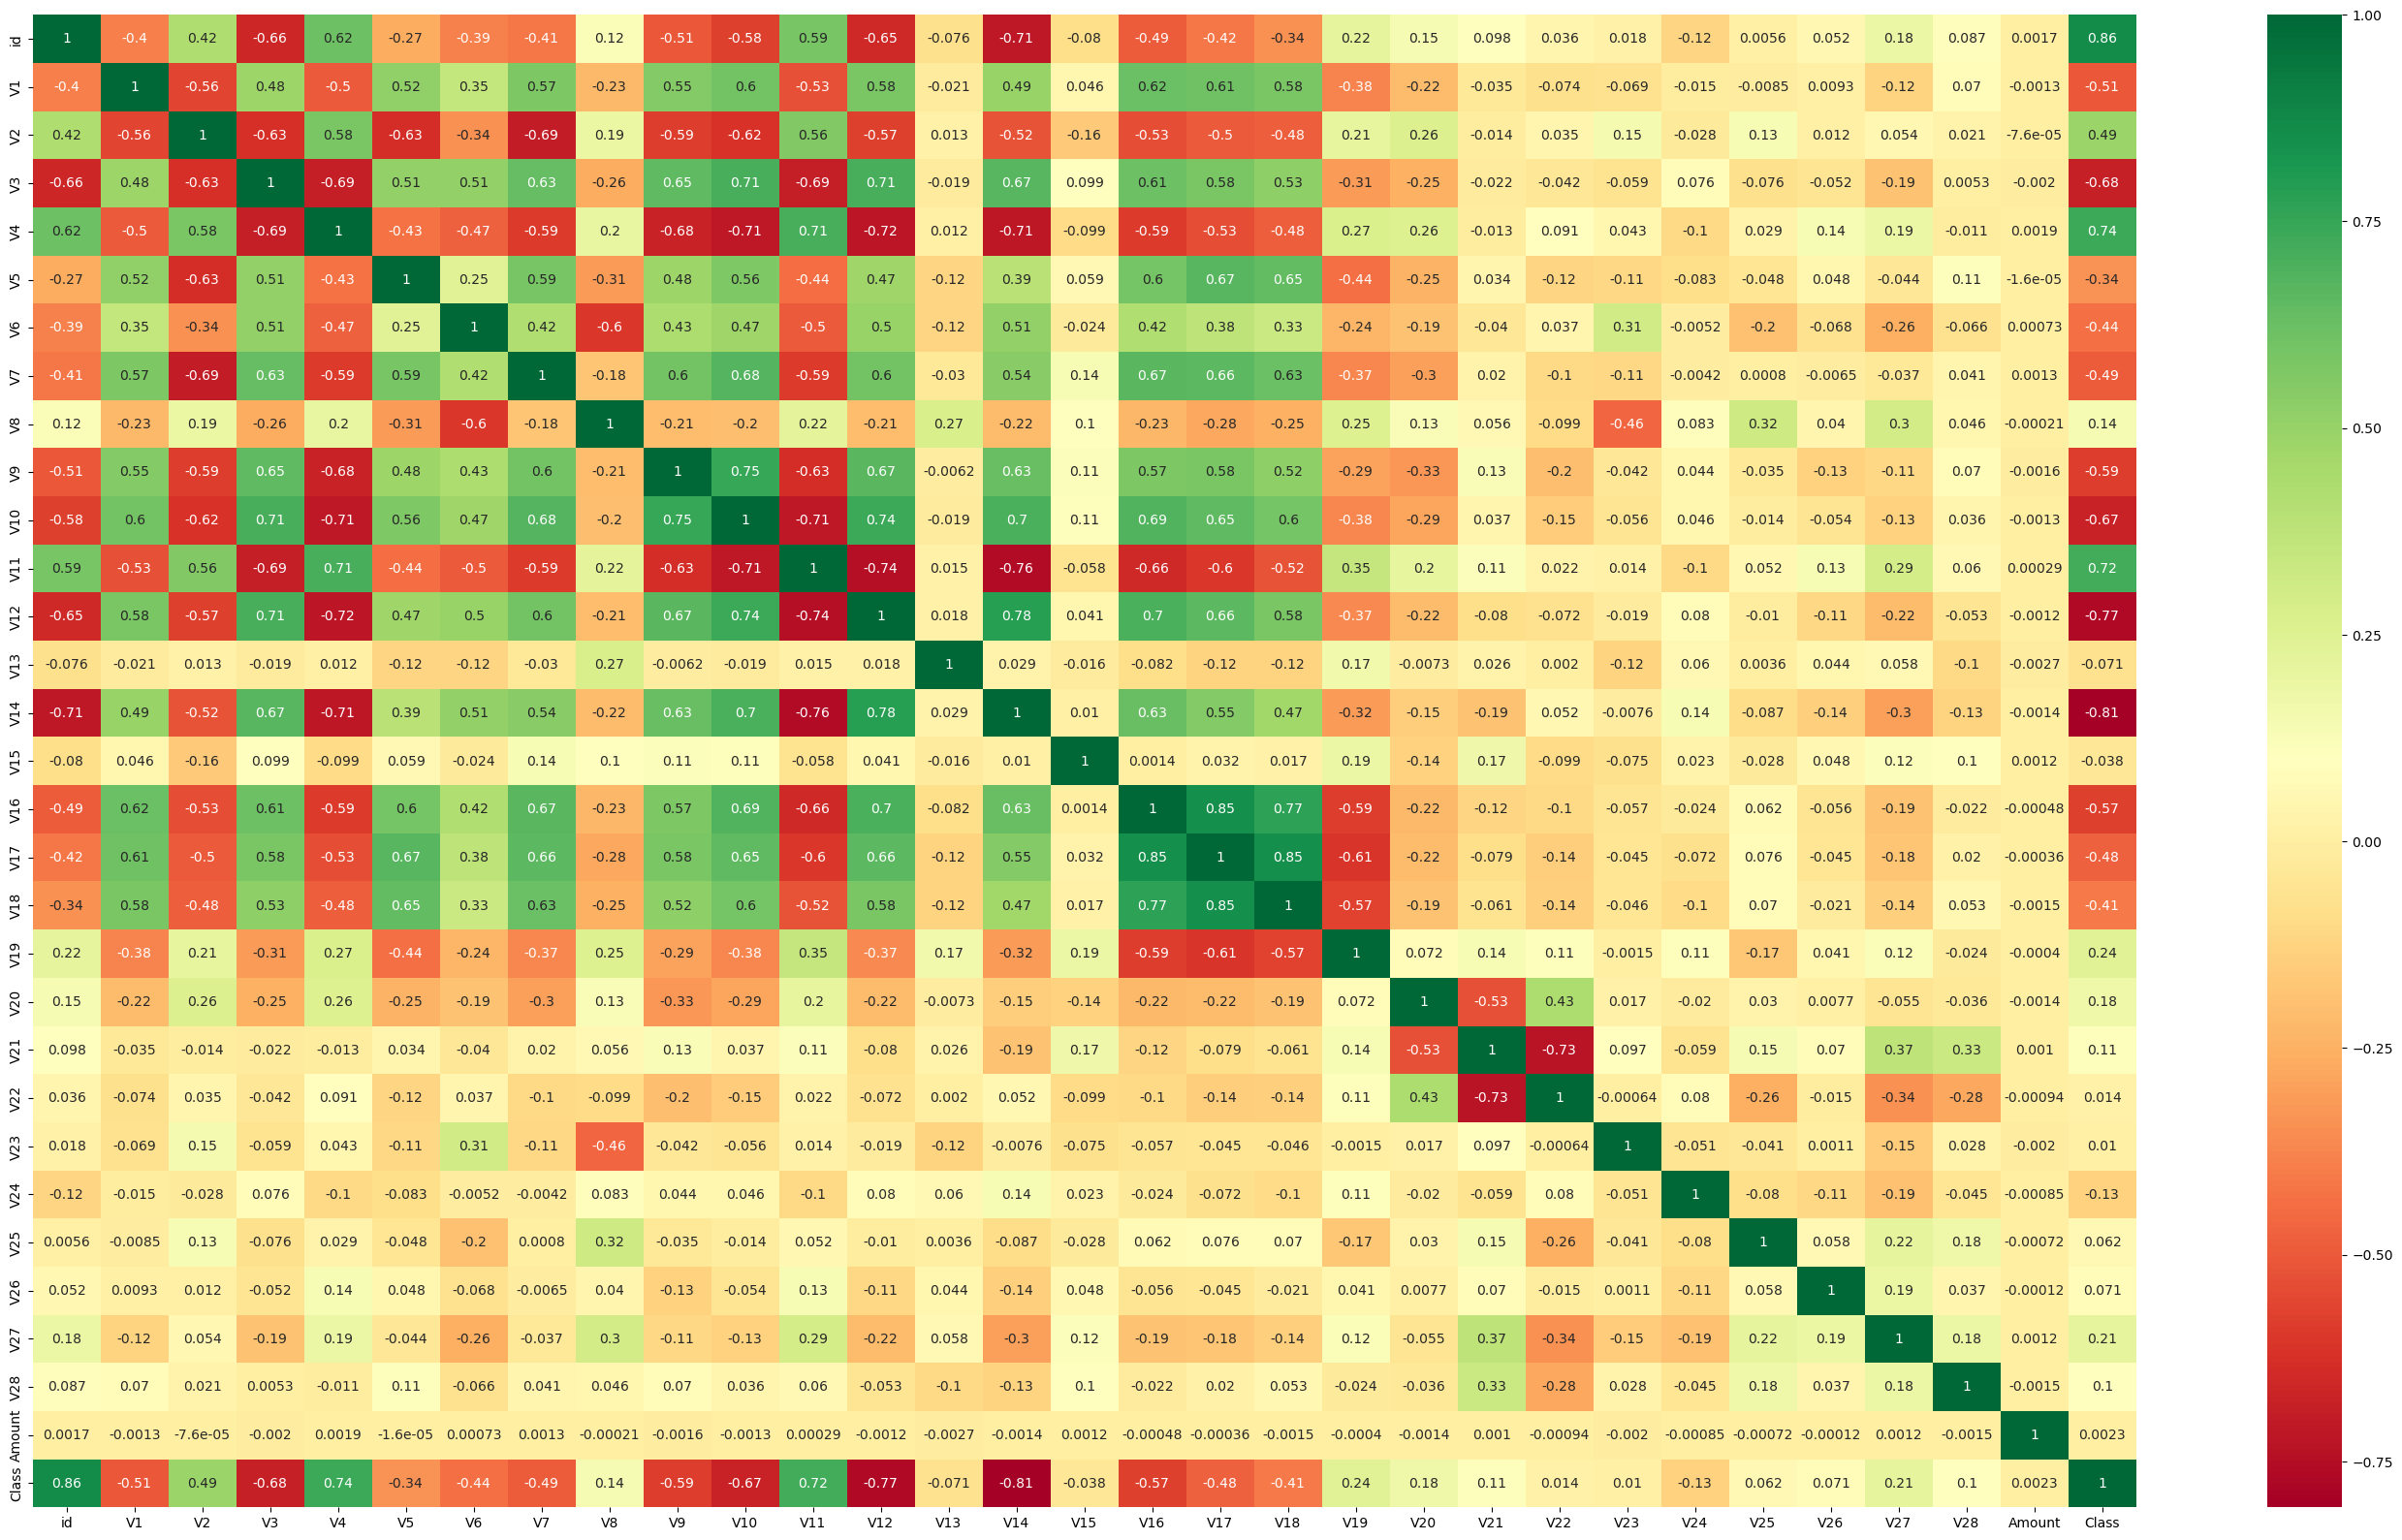

In [ ]:
# Show corellation between Features and target
plt.figure(figsize=(35, 20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### From heatmap graph

##### Observation for Target for correlation range  [0.5 , 1] , [-0.5 , -1]
* the features that are correlated to Class are V1, V3, V4, V9, V10, V11, V12, V14, V16

##### Observation for features for correlation range  [0.7 ,1] , [-0.7,-1]
* V18 is correlated to v16, v17
* v17 is correlated to v16
* v16 is correlated to v12
* v14 is correlated to v4, v10, v11, v12
* v12 is correlated to v3, v4, v10, v11
* v11 is correlated to v4, v10
* v10 is correlated to v3, v4, v9


#

## Feature Selection

In [ ]:
# selecting the features that have corr more than 0.5 and less than -0.5
feature_name=[]
correlation=df_.corr()['Class']
for i in range(len(x_res.columns)):
    if (( correlation> 0.5)[i]) or ((correlation < -0.5)[i]):
        feature_name.append(x_res.columns[i])
feature_name

['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

## splite the data

In [ ]:
X=df[feature_name]
y=df[['Class']]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

# Compare between Random forest and XGBoost

## Random Forest

In [ ]:
param={
    'n_estimators':[100,200,300] ,
    'criterion':['gini', 'entropy'] ,
    'max_depth':[1,2,3] ,

}
model_RF=RandomForestClassifier(random_state=42)

In [ ]:
grid=RandomizedSearchCV(model_RF,param,scoring='precision',cv=5,random_state=42)
grid.fit(x_train,y_train)
best_RF_model=grid.best_estimator_

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

last parameters {'n_estimators': 100, 'max_depth': 3, 'criterion': 'entropy'} for drop zeros only
last best score 0.663425925925926

In [ ]:
grid.best_params_

{'n_estimators': 300, 'max_depth': 1, 'criterion': 'entropy'}

### Evaluate Random Forest

In [ ]:
y_pred=best_RF_model.predict(x_test)
acc_RF=accuracy_score(y_test,y_pred)
acc_RF

0.9482569553759352

In [ ]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.91      1.00      0.95     56449
           1       1.00      0.90      0.95     56629

    accuracy                           0.95    113078
   macro avg       0.95      0.95      0.95    113078
weighted avg       0.95      0.95      0.95    113078



<AxesSubplot:>

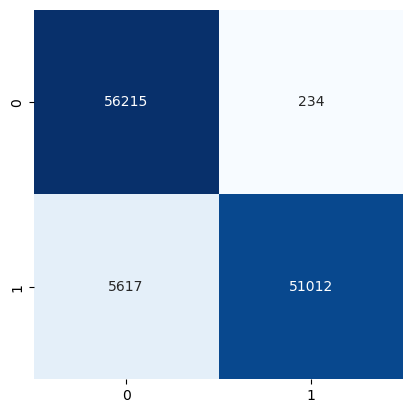

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


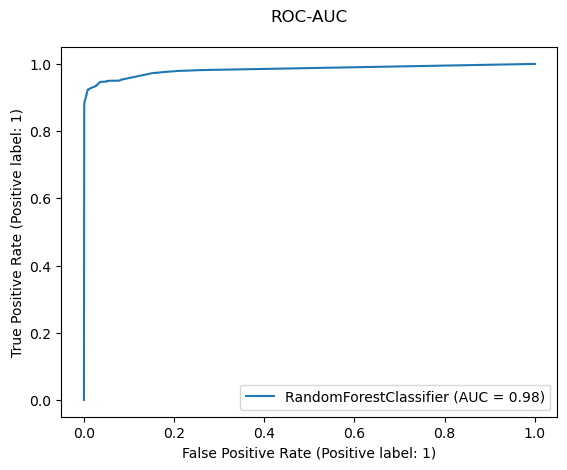

In [ ]:
plot_roc_curve(best_RF_model, x_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

## XGBoost

In [ ]:
# intializing model
xg = XGBClassifier()

In [ ]:
# training model
xg.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluate XGB

In [ ]:
y_pred=xg.predict(x_test)
acc_xg=accuracy_score(y_test,y_pred)
acc_xg

0.9995224535276535

In [ ]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56449
           1       1.00      1.00      1.00     56629

    accuracy                           1.00    113078
   macro avg       1.00      1.00      1.00    113078
weighted avg       1.00      1.00      1.00    113078



<AxesSubplot:>

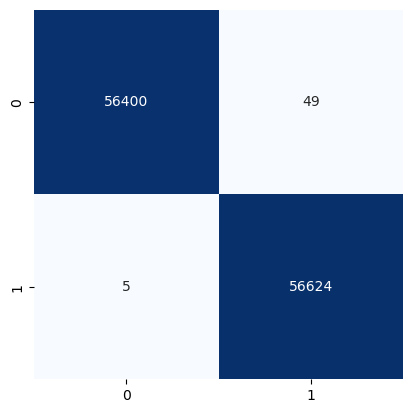

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


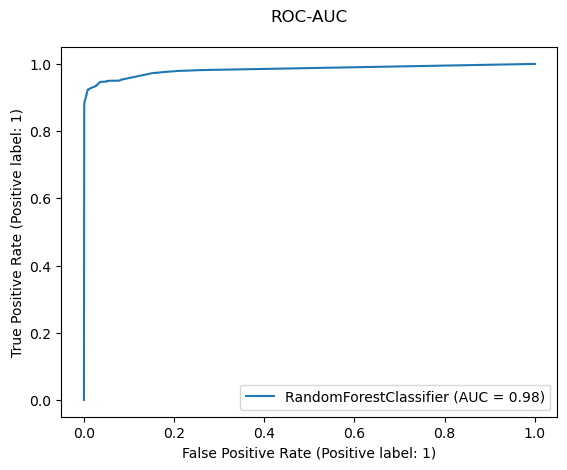

In [ ]:
plot_roc_curve(best_RF_model, x_test, y_test)
plt.title('ROC-AUC\n')
plt.show()